In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores

In [26]:
from sklearn.datasets import load_iris


df, df["target"] = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names']), load_iris()['target']

In [27]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
FEATURES = df.columns[:-1]

In [29]:
FEATURES

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [30]:
from sklearn.cluster import AgglomerativeClustering


agg = AgglomerativeClustering(affinity='euclidean', linkage='ward')

In [31]:
df['cluster_hierarquico'] = agg.fit_predict(df[FEATURES])

In [32]:
df.groupby('target')['cluster_hierarquico'].value_counts()

target  cluster_hierarquico
0       1                      50
1       0                      50
2       0                      50
Name: cluster_hierarquico, dtype: int64

Text(0.5, 1.0, 'cluster_hierarquico - petal length')

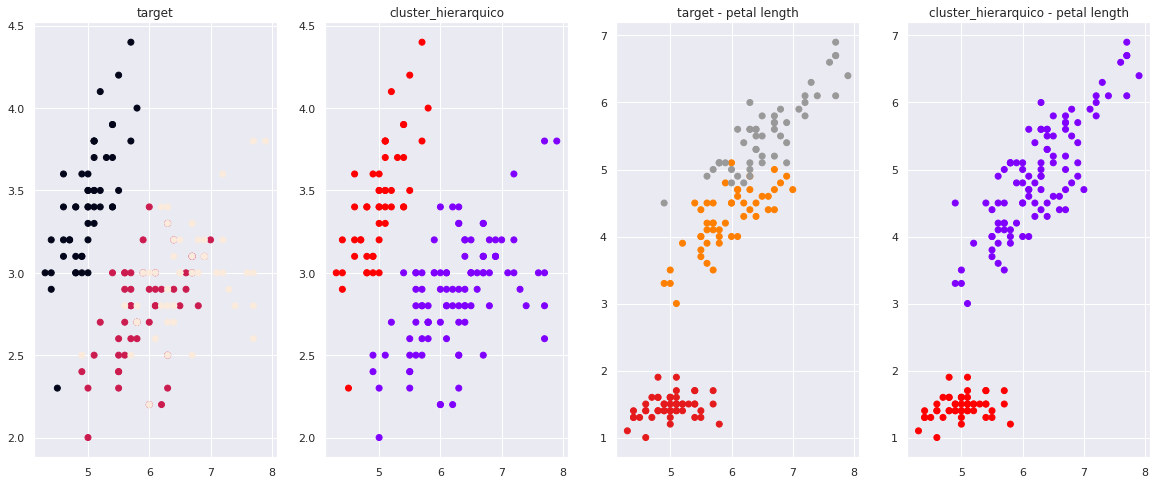

In [49]:
# construir dois sccater plots, um com o target e outro com o cluster_hierarquico
# Path: AULA/cluster_hierarquico.ipynb
fig, axes = plt.subplots(1,4,figsize=(20, 8))
axes[0].scatter(data=df, x='sepal length (cm)', y='sepal width (cm)', c='target')
axes[1].scatter(data=df, x='sepal length (cm)', y='sepal width (cm)', c='cluster_hierarquico', cmap=plt.cm.rainbow)
axes[2].scatter(data=df, x='sepal length (cm)', y='petal length (cm)', c='target', cmap=plt.cm.Set1)
axes[3].scatter(data=df, x='sepal length (cm)', y='petal length (cm)', c='cluster_hierarquico', cmap=plt.cm.rainbow)
axes[0].set_title('target')
axes[1].set_title('cluster_hierarquico')
axes[2].set_title('target - petal length')
axes[3].set_title('cluster_hierarquico - petal length')

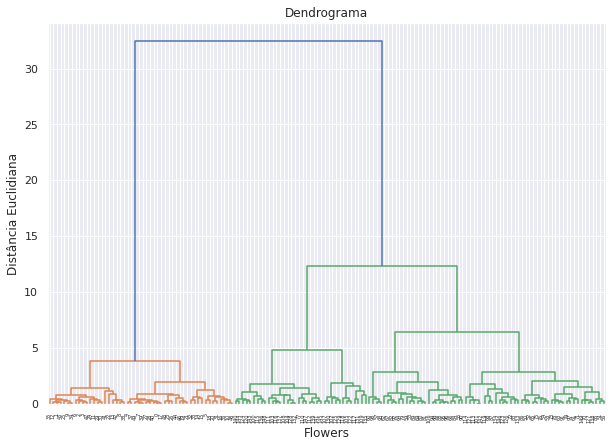

In [51]:
# Dendograma
# Path: AULA/cluster_hierarquico.ipynb
plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
plt.xlabel("Flowers")
plt.ylabel("Distância Euclidiana")
dend = dendrogram(linkage(df[FEATURES], method='ward'))



In [52]:
agg = AgglomerativeClustering(3,affinity='euclidean', linkage='single')
df['cluster_hierarquico'] = agg.fit_predict(df[FEATURES])
df.groupby('target')['cluster_hierarquico'].value_counts()


target  cluster_hierarquico
0       1                      50
1       0                      50
2       0                      48
        2                       2
Name: cluster_hierarquico, dtype: int64

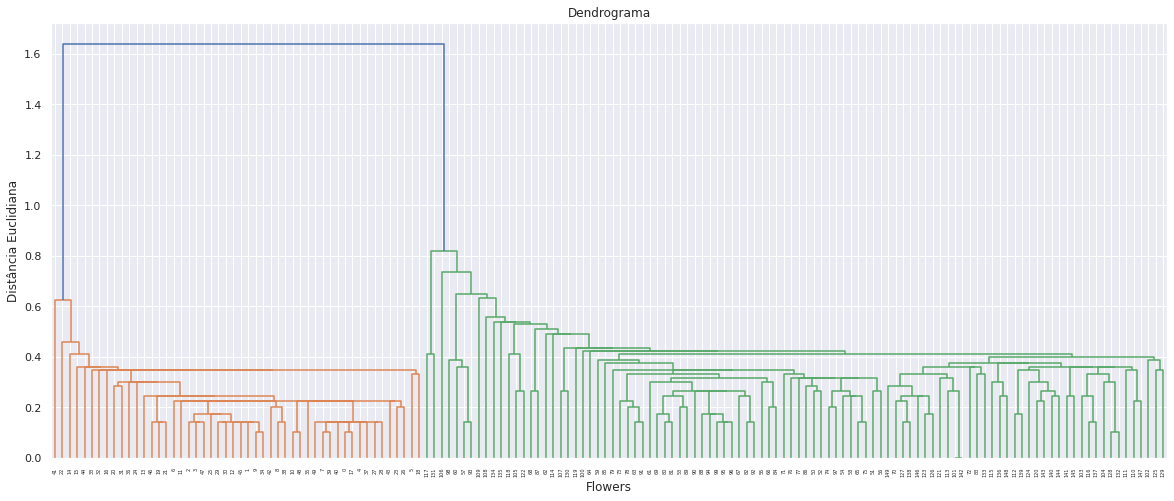

In [54]:
# Dendograma
# Path: AULA/cluster_hierarquico.ipynb
plt.figure(figsize=(20, 8))
plt.title("Dendrograma")
plt.xlabel("Flowers")
plt.ylabel("Distância Euclidiana")
dend = dendrogram(linkage(df[FEATURES], method='single'))